In [1]:
import math

import pandas as pd

In [2]:
df = pd.read_csv("president_county_candidate.csv").dropna() # https://www.kaggle.com/unanimad/us-election-2020?select=president_county_candidate.csv
df = df.rename(columns = {"total_votes": "votes", "candidate":"cand"})

df = df[df["votes"] > 0]
df["fist_digit"] = df["votes"].astype(str).str.slice(start=0, stop=1)

In [3]:
df.sample(10)

,state,county,cand,party,votes,won,fist_digit
15545,North Carolina,Columbus County,Howie Hawkins,GRN,23,False,2
3769,Kansas,Phillips County,Jo Jorgensen,LIB,50,False,5
983,Georgia,Monroe County,Donald Trump,REP,11060,True,1
10053,Massachusetts,Fitchburg,Joe Biden,DEM,8837,True,8
28720,Arkansas,Sharp County,Jo Jorgensen,LIB,52,False,5
1021,Georgia,Peach County,Jo Jorgensen,LIB,123,False,1
28331,Arkansas,Lincoln County,Jo Jorgensen,LIB,21,False,2
12307,Mississippi,Smith County,Brian Carroll,ASP,4,False,4
22634,Vermont,Stowe,Brian Carroll,ASP,1,False,1
15414,North Carolina,Alleghany County,Donald Trump,REP,4527,True,4


In [4]:
ben = pd.concat(
    [
        df[df["cand"] == "Joe Biden"]["fist_digit"]
        .value_counts(normalize=True)
        .sort_index(),
        df[df["cand"] == "Donald Trump"]["fist_digit"]
        .value_counts(normalize=True)
        .sort_index(),
    ],
    axis=1,
)

ben.columns = ["Joe Biden", "Donald Trump"]

ben["Benford"] = [math.log10(1 + 1 / n) for n in range(1, 10)]

In [5]:
ben

,Joe Biden,Donald Trump,Benford
1,0.286603,0.286444,0.301030
2,0.184403,0.166444,0.176091
3,0.126416,0.126667,0.124939
4,0.112419,0.105778,0.096910
5,0.072428,0.088000,0.079181
6,0.066652,0.064000,0.066947
7,0.054655,0.063111,0.057992
8,0.049322,0.052444,0.051153
9,0.047101,0.047111,0.045757


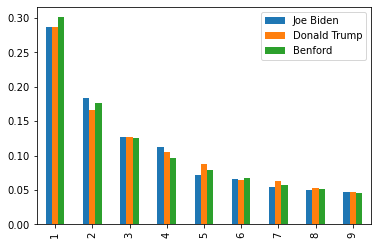

In [6]:
ben.plot.bar();